In [2]:
# Q7. Decision Tree on Iris with varying depth (Colab-ready)

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1) Load data
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# 2) Train/test split (stratified for class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

# 3) Train trees with max_depth = 1, 2, 3
depths = [1, 2, 3]
rows = []
models = {}

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc  = accuracy_score(y_test, y_pred_test)
    rows.append({"max_depth": d, "train_acc": train_acc, "test_acc": test_acc})
    models[d] = clf

# 4) Show results as a small table
df = pd.DataFrame(rows)
display(df.style.format({"train_acc":"{:.3f}", "test_acc":"{:.3f}"}))

# 5) (Optional) quick peek at feature importance for the best depth
best_depth = df.sort_values("test_acc", ascending=False).iloc[0]["max_depth"]
best_model = models[best_depth]
imp = pd.Series(best_model.feature_importances_, index=feature_names)
print(f"\nBest depth by test accuracy: {int(best_depth)}")
print("Feature importances for that model:")
print(imp.round(3).sort_values(ascending=False))

,max_depth,train_acc,test_acc
0,1,0.667,0.667
1,2,0.971,0.889
2,3,0.981,0.978



Best depth by test accuracy: 3
Feature importances for that model:
petal length (cm)    0.551
petal width (cm)     0.449
sepal width (cm)     0.000
sepal length (cm)    0.000
dtype: float64


  #question 7
  #4)
  Underfitting sign (high bias):
If max_depth = 1 shows low training and test accuracy (and they’re similar), the tree is too simple → underfits.

Good fit:
As depth increases to 2 or 3, you should see higher training accuracy and usually higher test accuracy. The depth with the highest test accuracy is your best generalizing model.

Overfitting sign (high variance):
If at higher depth the training accuracy is much higher than test accuracy (big gap), that’s overfitting. Choose the smaller depth that yields the best (or near-best) test accuracy.

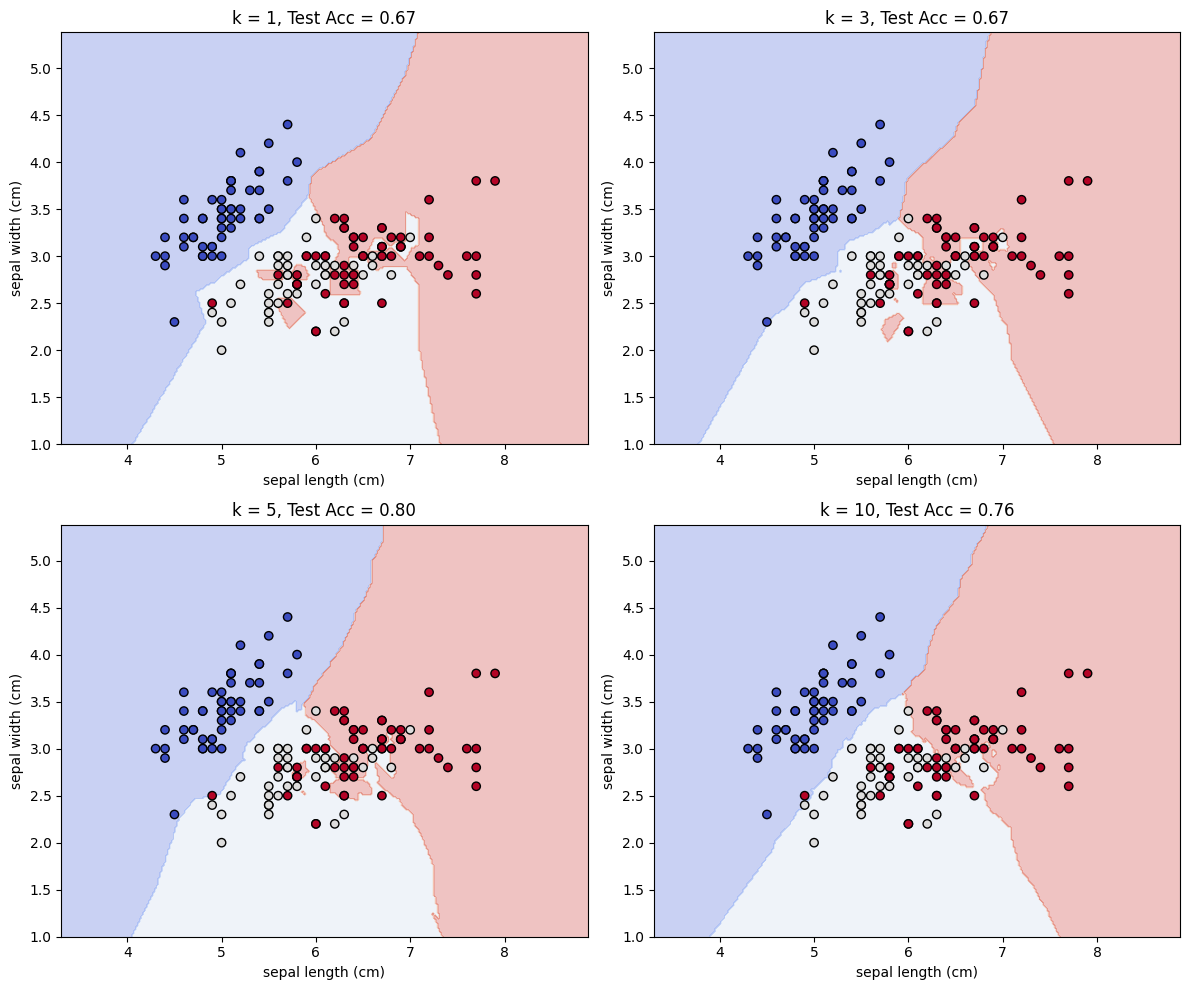

In [3]:
# Q8. kNN Classification on Iris (2 features only, Colab-ready)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# 1) Load Iris dataset (use only sepal length & sepal width)
iris = load_iris()
X = iris.data[:, :2]  # first 2 features
y = iris.target
feature_names = iris.feature_names[:2]
class_names = iris.target_names

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 2) Define function to plot decision boundary
def plot_decision_boundary(X, y, model, title):
    h = 0.02  # mesh step
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)

# 3) Train models with k=1,3,5,10 and plot
ks = [1, 3, 5, 10]
plt.figure(figsize=(12, 10))

for i, k in enumerate(ks, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)

    plt.subplot(2, 2, i)
    plot_decision_boundary(X, y, knn, f"k = {k}, Test Acc = {acc:.2f}")

plt.tight_layout()
plt.show()


# question 8
# 4)
k=1: Very complex, jagged boundaries, perfectly fits training points → risk of overfitting.

k=3 or 5: Boundaries become smoother, better generalization, fewer spurious regions.

k=10: Boundaries are too smooth, some minority class regions get swallowed → may underfit.

 In short: small k → high variance, complex boundaries. Large k → smoother, stable boundaries but higher bias.


Confusion Matrix (rows = true, cols = pred):
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]] 

Classification Report:
              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        15
  versicolor      0.938     1.000     0.968        15
   virginica      1.000     0.933     0.966        15

    accuracy                          0.978        45
   macro avg      0.979     0.978     0.978        45
weighted avg      0.979     0.978     0.978        45


AUC (per class):
  setosa: 1.000
  versicolor: 0.996
  virginica: 0.996
Micro-average AUC: 0.997
Macro-average AUC: 0.997


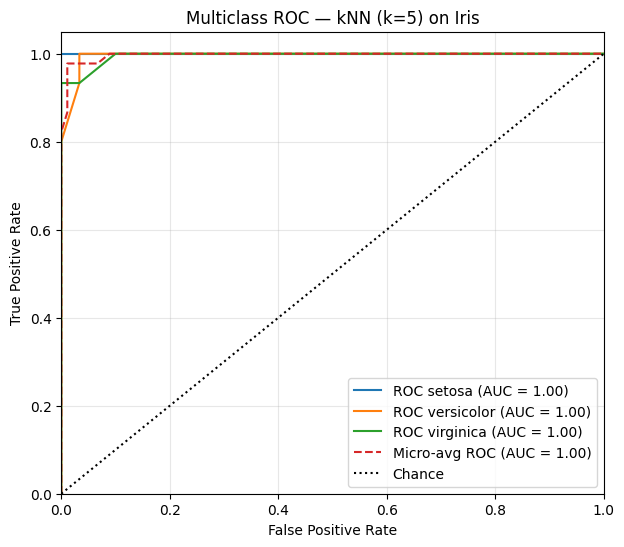

In [4]:
# Q9. Performance Evaluation (kNN, k=5) on Iris  — Colab-ready

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, auc
)
from sklearn.preprocessing import label_binarize

# 1) Load data and split
iris = load_iris()
X, y = iris.data, iris.target
class_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

# 2) Train kNN (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 3) Confusion matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (rows = true, cols = pred):\n", cm, "\n")

# 4) Classification report (accuracy, precision, recall, F1 per class + averages)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names, digits=3))

# 5) ROC + AUC (multiclass via One-vs-Rest)
#    kNN supports predict_proba, which we need for ROC curves.
y_test_bin = label_binarize(y_test, classes=np.unique(y))
proba = knn.predict_proba(X_test)  # shape (n_samples, n_classes)
n_classes = y_test_bin.shape[1]

# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Micro-average (aggregate all classes)
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Macro-average (average AUCs equally across classes)
roc_auc["macro"] = np.mean([roc_auc[i] for i in range(n_classes)])

print(f"\nAUC (per class):")
for i, name in enumerate(class_names):
    print(f"  {name}: {roc_auc[i]:.3f}")
print(f"Micro-average AUC: {roc_auc['micro']:.3f}")
print(f"Macro-average AUC: {roc_auc['macro']:.3f}")

# 6) Plot ROC curves
plt.figure(figsize=(7, 6))
for i, name in enumerate(class_names):
    plt.plot(fpr[i], tpr[i], label=f"ROC {name} (AUC = {roc_auc[i]:.2f})")

plt.plot(fpr["micro"], tpr["micro"], linestyle="--",
         label=f"Micro-avg ROC (AUC = {roc_auc['micro']:.2f})")
plt.plot([0, 1], [0, 1], 'k:', label="Chance")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC — kNN (k=5) on Iris")
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()
